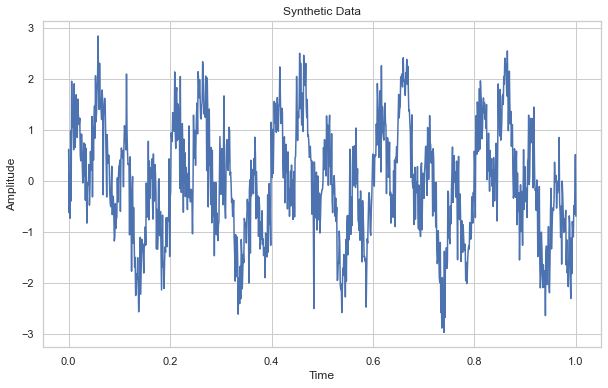

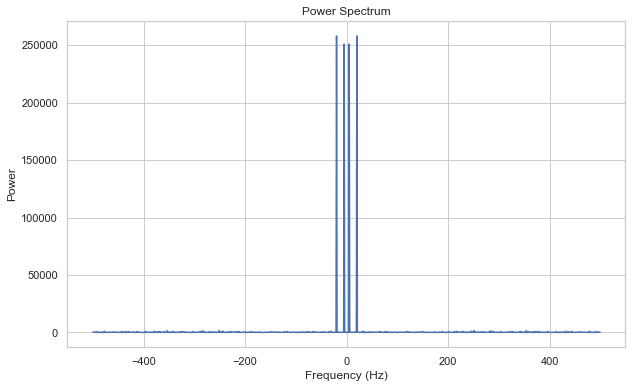

Recovered frequencies from spectrum: [ 20. -20.]


In [3]:
#Testing the code with fake data
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# Generate synthetic data
def generate_synthetic_data(num_samples, freq1, freq2, noise_level=0, t = np.linspace(0, 1, num_samples)):
    signal1 = np.sin(2 * np.pi * freq1 * t)
    signal2 = np.sin(2 * np.pi * freq2 * t)
    noise = np.random.normal(0, noise_level, num_samples)
    synthetic_data = signal1 + signal2 + noise
    return synthetic_data

# Perform Fourier transform to recover frequencies
def recover_frequencies(data, sampling_rate):
    N = len(data)
    frequencies = np.fft.fftfreq(N, d=1/sampling_rate)
    fft_data = np.fft.fft(data)
    power_spectrum = np.abs(fft_data)**2
    return frequencies, power_spectrum

# Parameters for synthetic data
num_samples = 1000
sampling_rate = 1000  # Hz
freq1 = 5  # Hz
freq2 = 20  # Hz
noise_level = 0.5
time = np.linspace(0, 1, num_samples)

# Generate synthetic data
synthetic_data = generate_synthetic_data(num_samples, freq1, freq2, noise_level)

# Plot synthetic data
plt.figure(figsize=(10, 6))
sns.lineplot(x=time, y=synthetic_data)
plt.title('Synthetic Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

# Perform Fourier transform
frequencies, power_spectrum = recover_frequencies(synthetic_data, sampling_rate)

# Plot power spectrum
plt.figure(figsize=(10, 6))
sns.lineplot(x=frequencies, y=power_spectrum)
plt.title('Power Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.show()

# Find peaks in power spectrum
peaks_idx = np.argsort(power_spectrum)[-2:]  # Get indices of two highest peaks
peak_freqs = frequencies[peaks_idx]  # Get corresponding frequencies
print("Recovered frequencies from spectrum:", peak_freqs)


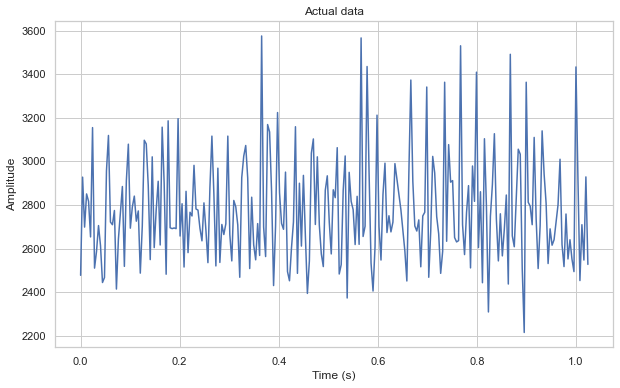

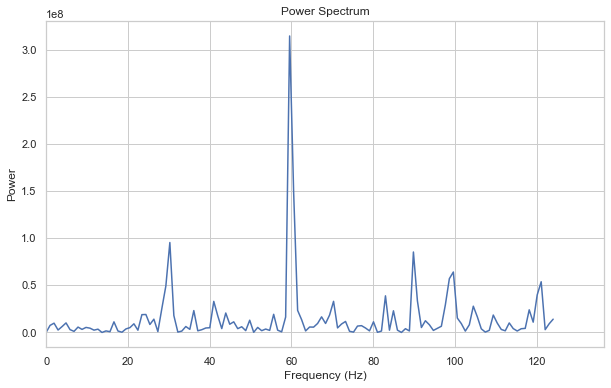

Recovered frequencies from spectrum: [  83.0078125  -83.0078125  120.1171875 -120.1171875   29.296875
  -29.296875   121.09375   -121.09375    -98.6328125   98.6328125
  -99.609375    99.609375    89.84375    -89.84375    -30.2734375
   30.2734375  -60.546875    60.546875   -59.5703125   59.5703125]
Power of peaks: [3.89064808e+07 3.89064808e+07 3.98419404e+07 3.98419404e+07
 4.94164063e+07 4.94164063e+07 5.38588470e+07 5.38588470e+07
 5.71171975e+07 5.71171975e+07 6.41952923e+07 6.41952923e+07
 8.54356971e+07 8.54356971e+07 9.55060162e+07 9.55060162e+07
 1.49044562e+08 1.49044562e+08 3.14806446e+08 3.14806446e+08]


In [4]:
data = np.genfromtxt('pulsar.dat') #import data
number_of_samples = len(data)
periodsample = 0.004 # seconds
time = np.linspace(0, number_of_samples*periodsample, number_of_samples)

# Plot actual data
plt.figure(figsize=(10, 6))
sns.lineplot(x=time, y=data)
plt.title('Actual data')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

sampling_rate = 1/periodsample  # per milli second

# Perform Fourier transform
frequencies, power_spectrum = recover_frequencies(data, sampling_rate)

# Plot power spectrum
plt.figure(figsize=(10, 6))
power_spectrum[0] = 0 #setting to zero to remove the constant, non varying luminosity
sns.lineplot(x=frequencies, y=power_spectrum)
plt.title('Power Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.xlim(0,)
plt.show()


# Find peaks in power spectrum
peaks_idx = np.argsort(power_spectrum)[-20:]  # Get indices of two highest peaks
freqs_actual = frequencies[peaks_idx]  # Get corresponding frequencies
powers_actual = power_spectrum[peaks_idx]  # Get corresponding power
print("Recovered frequencies from spectrum:", freqs_actual)
print("Power of peaks:", powers_actual)


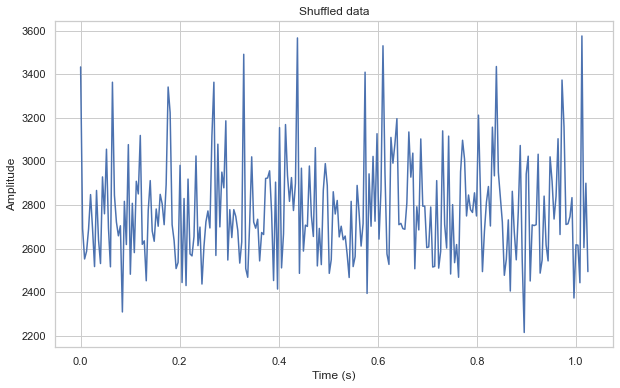

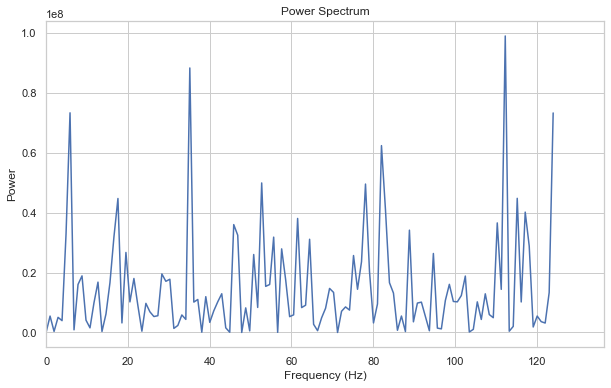

Recovered frequencies from spectrum: [-112.3046875]
Power of the peaks: [99100546.04891479]


In [5]:
# Shuffle data up
rng = np.random.default_rng()
shuffled = data.copy()
rng.shuffle(shuffled)
if np.array_equal(data, shuffled):
    print("Data is not shuffled")


# Plot shuffled data
plt.figure(figsize=(10, 6))
sns.lineplot(x=time, y=shuffled)
plt.title('Shuffled data')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Perform shuffled Fourier transform
frequencies, power_spectrum = recover_frequencies(shuffled, sampling_rate)

# Plot the shuffled power spectrum
plt.figure(figsize=(10, 6))
power_spectrum[0] = 0 #setting to zero to remove the constant, non varying luminosity
sns.lineplot(x=frequencies, y=power_spectrum)
plt.title('Power Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.xlim(0,)
plt.show()


# Find peaks in power spectrum
peaks_idx = np.argsort(power_spectrum)[-1:]  # Get indices of two highest peaks
peak_freqs = frequencies[peaks_idx]  # Get corresponding frequencies
peak_power = power_spectrum[peaks_idx]  # Get corresponding power
print("Recovered frequencies from spectrum:", peak_freqs)
print("Power of the peaks:", peak_power)


In [6]:
peaks = np.zeros(100000000)

In [8]:
n_trials = 10000000
peaks = np.zeros(n_trials)
for i in range(n_trials):   
    shuffled = data.copy()
    rng.shuffle(shuffled)
    frequencies, power_spectrum = recover_frequencies(shuffled, sampling_rate)
    peaks_idx = np.argsort(power_spectrum)[-2:]  # Get indices of two highest peaks
    peak_power = power_spectrum[peaks_idx]  # Get corresponding power
    #print("Power of the peaks:", peak_power[0]) # Power of the second highest peak, as highest is with zero frequency, the constant luminosity
    peaks[i] = peak_power[0]
print(peaks)
np.save('peaks.npy', peaks)

[85698195.37392087 78066214.3166021  57893049.67410279 ...
 71930738.92402534 73323120.05087176 88505175.61444922]


In [ ]:
above_1st_peak = (peaks > powers_actual[-1]).sum()
print("Number of peaks above the highest peak in the actual data:", above_1st_peak)

Number of peaks above the highest peak in the actual data: 1


In [ ]:
above_2nd_peak = (peaks > powers_actual[-3]).sum()
print("Number of peaks above the highest peak in the actual data:", above_2nd_peak)

Number of peaks above the highest peak in the actual data: 602


In [28]:
above_1st_peak = (peaks > powers_actual[-1]).sum()
print("Number of peaks above the 1st peak in the actual data:", above_1st_peak, "at frequency:", freqs_actual[-1], "Hz")
above_2nd_peak = (peaks > powers_actual[-3]).sum()
print("Number of peaks above the 2nd peak in the actual data:", above_2nd_peak, "at frequency:", freqs_actual[-3], "Hz")
above_3rd_peak = (peaks > powers_actual[-5]).sum()
print("Number of peaks above the 3rd peak in the actual data:", above_3rd_peak, "at frequency:", freqs_actual[-5], "Hz")
above_4th_peak = (peaks > powers_actual[-7]).sum()
print("Number of peaks above the 4th peak in the actual data:", above_4th_peak, "at frequency:", freqs_actual[-8], "Hz")
above_5th_peak = (peaks > powers_actual[-9]).sum()
print("Number of peaks above the 5th peak in the actual data:", above_5th_peak, "at frequency:", freqs_actual[-9], "Hz")

chance1st = above_1st_peak/n_trials
chance2nd = above_2nd_peak/n_trials
chance3rd = above_3rd_peak/n_trials
chance4th = above_4th_peak/n_trials
chance5th = above_5th_peak/n_trials

Number of peaks above the 1st peak in the actual data: 27 at frequency: 59.5703125 Hz
Number of peaks above the 2nd peak in the actual data: 58653 at frequency: 60.546875 Hz
Number of peaks above the 3rd peak in the actual data: 1931390 at frequency: 30.2734375 Hz
Number of peaks above the 4th peak in the actual data: 3531769 at frequency: 89.84375 Hz
Number of peaks above the 5th peak in the actual data: 8701951 at frequency: 99.609375 Hz


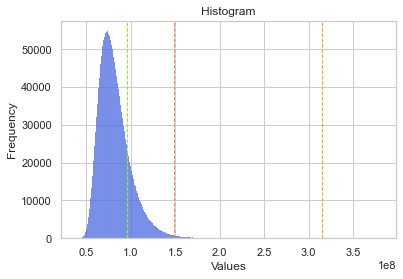

In [17]:
# Create histogram using Seaborn
sns.histplot(peaks, kde=False, color='royalblue')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.axvline(powers_actual[-1], color='orange', linestyle='dashed', linewidth=1)
plt.axvline(powers_actual[-3], color='coral', linestyle='dashed', linewidth=1)
plt.axvline(powers_actual[-5], color='chartreuse', linestyle='dashed', linewidth=1)

# Show plot
plt.show()

In [31]:
from statistics import NormalDist

sigma_first = NormalDist().inv_cdf((2 - chance1st) / 2.)
sigma_second = NormalDist().inv_cdf((2 - chance2nd) / 2.)
sigma_third = NormalDist().inv_cdf((2 - chance3rd) / 2.)
sigma_fourth = NormalDist().inv_cdf((2 - chance4th) / 2.)
sigma_fifth = NormalDist().inv_cdf((2 - chance5th) / 2.)
print("Sigma for the 1st peak:", sigma_first)
print("Sigma for the 2nd peak:", sigma_second)
print("Sigma for the 3rd peak:", sigma_third)
print("Sigma for the 4th peak:", sigma_fourth)
print("Sigma for the 5th peak:", sigma_fifth)

#Treating first second as independent events
sigma_combined60hz = NormalDist().inv_cdf((2 - chance1st * chance2nd) / 2.)
print("Sigma for the combined 1st and 2nd peak:", sigma_combined60hz)

Sigma for the 1st peak: 4.692414035387353
Sigma for the 2nd peak: 2.755218229784059
Sigma for the 3rd peak: 1.3013490643801593
Sigma for the 4th peak: 0.9284447784185146
Sigma for the 5th peak: 0.16341067299706255
Sigma for the combined 1st and 2nd peak: 5.652247755691892


[0.         0.00401569 0.00803137 0.01204706 0.01606275 0.00341176
 0.00742745 0.01144314 0.01545882 0.00280784 0.00682353 0.01083922
 0.0148549  0.00220392 0.00621961 0.01023529 0.01425098 0.0016
 0.00561569 0.00963137 0.01364706 0.00099608 0.00501176 0.00902745
 0.01304314 0.00039216 0.00440784 0.00842353 0.01243922 0.0164549
 0.00380392 0.00781961 0.01183529 0.01585098 0.0032     0.00721569
 0.01123137 0.01524706 0.00259608 0.00661176 0.01062745 0.01464314
 0.00199216 0.00600784 0.01002353 0.01403922 0.00138824 0.00540392
 0.00941961 0.01343529 0.00078431 0.0048     0.00881569 0.01283137
 0.00018039 0.00419608 0.00821176 0.01222745 0.01624314 0.00359216
 0.00760784 0.01162353 0.01563922 0.00298824 0.00700392 0.01101961
 0.01503529 0.00238431 0.0064     0.01041569 0.01443137 0.00178039
 0.00579608 0.00981176 0.01382745 0.00117647 0.00519216 0.00920784
 0.01322353 0.00057255 0.00458824 0.00860392 0.01261961 0.01663529
 0.00398431 0.008      0.01201569 0.01603137 0.00338039 0.00739608


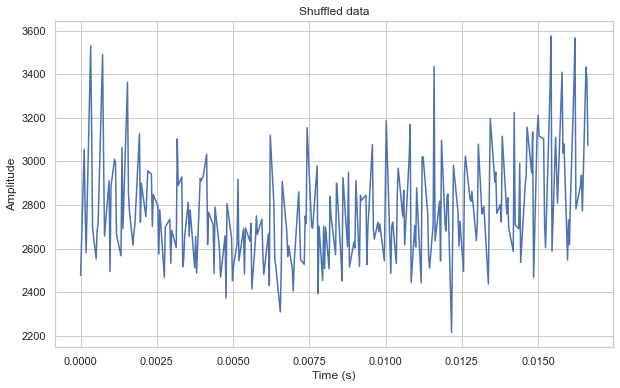

In [37]:
# Folding data
data = np.genfromtxt('pulsar.dat') #import data

def fold_data(data, foldfreq, time):
    foldperiod = 1/foldfreq
    foldedtime = time % foldperiod
    print(foldedtime)
    return foldedtime

foldedtime = fold_data(data, 60, time)

# Plot folded data
plt.figure(figsize=(10, 6))
sns.lineplot(x=foldedtime, y=data)
plt.title('Shuffled data')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

    



